¿Cuantos registros y variables cuenta el dataset?


In [28]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

2. ¿Cómo están los valores de la variable Age?

        2.1 ¿Cuál es la distribución por tipo de animal

        2.2 Cuales son los estadísticos descriptivos para esta variable.

<Axes: title={'center': 'Type animal per age'}, xlabel='AgeYear', ylabel='count'>

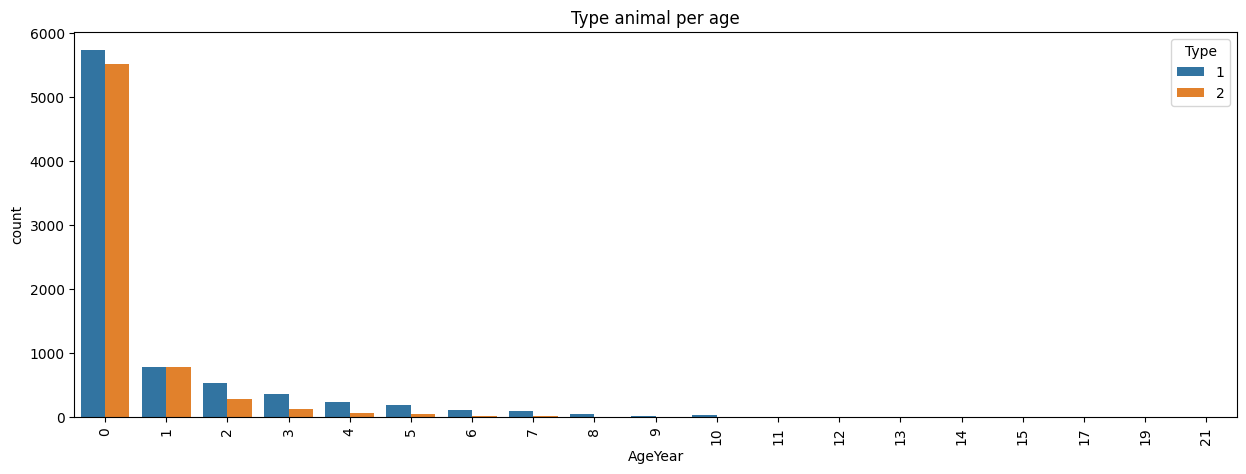

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


df["AgeYear"] = df["Age"].apply(lambda x: x//12)

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Type animal per age")
sns.countplot(x="AgeYear", data=df, hue="Type")



<Axes: title={'center': 'Type animal per age'}, xlabel='isAdult', ylabel='count'>

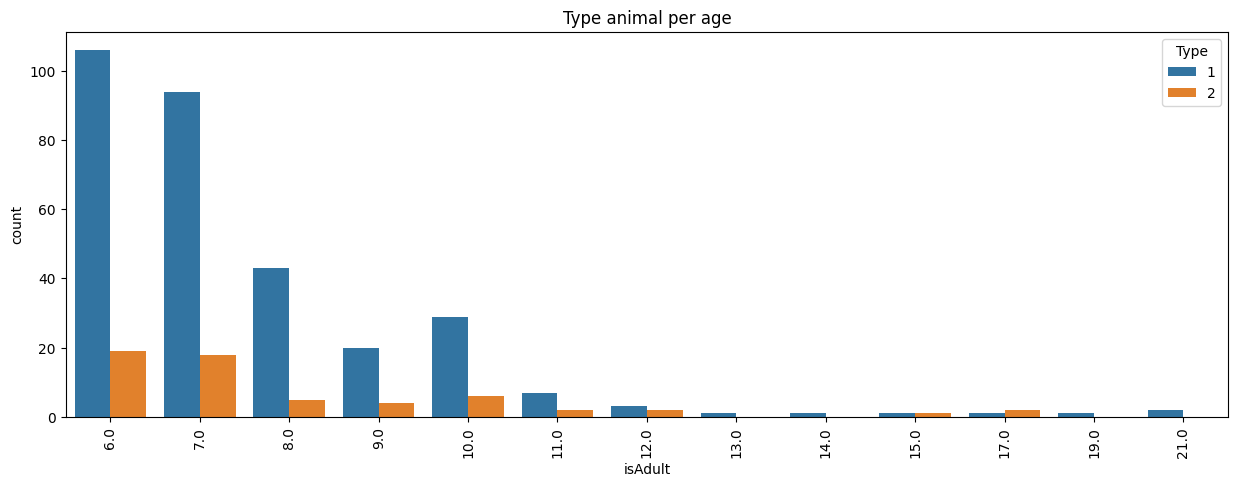

In [55]:
df["isAdult"] = np.where(df["AgeYear"] > 5, df["AgeYear"], 0)
# remove 0 of the column dfisBaby
df["isAdult"] = df["isAdult"].replace(0, np.nan)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Type animal per age")
sns.countplot(x="isAdult", data=df, hue="Type")



In [62]:
df["Age"].describe()


count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

¿Hay más datos de perros o de gatos?

In [63]:
df['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

¿Cómo es la velocidad de adopción para perros y gatos?

<Axes: title={'center': 'Adoption Speed per Animal Type'}, xlabel='AdoptionSpeed', ylabel='count'>

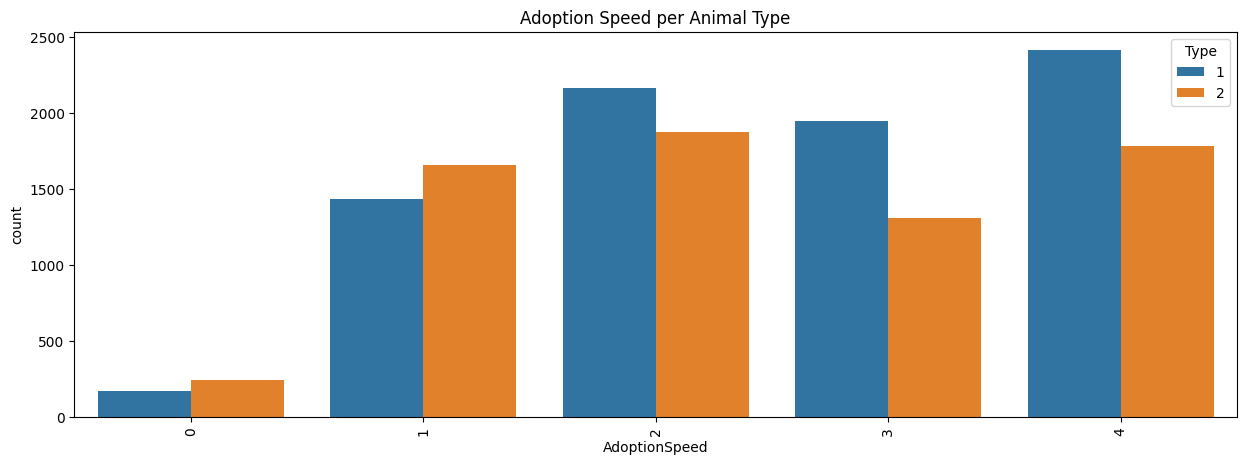

In [67]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Adoption Speed per Animal Type")
sns.countplot(x="AdoptionSpeed", data=df, hue="Type")

5. Encuentre los nombres sin valores.

        5.1 ¿Cuántos para gatos y perros?
        
        5.2 ¿Eliminar o reemplazar los registros?, justifique

In [78]:
print("Perros con nombres nulos: ", df[df["Type"] == 1]["Name"].isna().sum())
print("Gatos con nombres nulos: ", df[df["Type"] == 2]["Name"].isna().sum())

Perros con nombres nulos:  649
Gatos con nombres nulos:  608


Decidimos reemplazar los registros, debido a que no sabemos si el nombre es una variable significativa para decidir si se adopta o no. Esto significa que un nombre nulo puede llegar a influir en la rapidez de adopción

6. ¿la salud podría significar algo en la velocidad de adopción?

AdoptionSpeed    0     1     2     3     4    All
Health                                           
1              392  2999  3925  3150  4012  14478
2               17    89   106    98   171    481
3                1     2     6    11    14     34
All            410  3090  4037  3259  4197  14993


<Axes: title={'center': 'Correlation between AdoptionSpeed and Health'}, xlabel='AdoptionSpeed', ylabel='Health'>

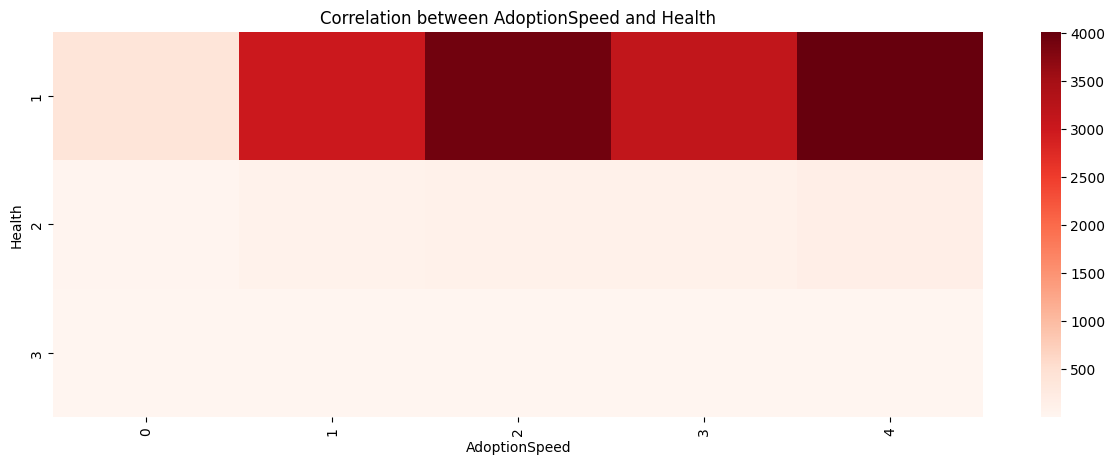

In [85]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Correlation between AdoptionSpeed and Health")

print(pd.crosstab(df["Health"], df["AdoptionSpeed"], margins=True))
sns.heatmap(pd.crosstab(df["Health"], df["AdoptionSpeed"]), cmap="Reds")